# <b>Introduction to Statistical Learning, 2nd Edition</b>
## by James, Witten, Hastie, Tibshirani

### notes by Melis Tekant

## Chapter 1

### 1.2 Examples and Framework

Unsupervised learning: identifying common patterns, organizing data. No outcome variable, just a set of features to group. Difficult to know how well you're doing. Can be a really favorable method with large datasets that might require a human to label them otherwise (for supervised learning).

## Chapter 2

### Introduction to Regression Models

$Y=f(X)+\epsilon$

with $X=(X_1,X_2,...,X_p)$

$f$ is the regression function. Gives the conditional expectation of Y given X at each value of X, where X can be a multi-dimensional input. The choice of $f$ minimizes the mean-squared prediction error: 

$f(x)=E(Y|X=x)$ is the function that minimizes $E[(Y-g(x))^2|X=x]$ for all X.

$\epsilon = Y-f(x)$ is the irreducable error, and for any estimate $\hat f(x)$ of $f(x)$,

$E[(Y-\hat f(X))^2|X=x]=[f(x)-\hat f(x)]^2+Var(\epsilon)$

The first term on the right hand side is the reducable error, that is, it shrinks as the estimate approaches the true function f, whereas the second term is irreducable, related to the spread of the data.

In many cases, there are very few points at $X=x$ so we can compute $f(x)$ using points in the neighboorhood of $x$. Called nearest neighbor average or local averaging. As dimensions get larger, this method stops working, to be discussed.

### Dimensionality and Structured Models

Curse of dimensionality: nearest neighbors tend to be far in high dimensions, but we need to average many nearest neighbors to get an accurate estimate. In high dimensions, nearestneighbors may not be local, thus we might lose the locality of aspect of the estimate.

How to get around? Introduce structure to models.

Simplest example: linear model

$f_L(X)=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p$

p+1 parameters ${\beta_0,...,\beta_p}$.

Linear models are often not correct, but gives an interpretable result. Can add quadratic terms to create better fit. Careful about overfitting (how do we know when it's just right?)

Different methods have trade-off between interpretability and flexibility. From high interp./low flex. to low interp./high flex.: subset selection, lasso; least squares; generalized additive models, trees; bagging, boosting; support vector machines.



### Model Selection and Bias-Variance Tradeoff

To assess model accuracy: compute average squared prediction error over training set <- Might be biased towards overfitting, so use additional fresh data, different than the training set. 

Bias-variance trade-off: 

$E(y_0-f\hat(x_0))^2=Var(\hat f(x_0))+[Bias(\hat f(x_0))]^2+Var(\epsilon)$

where the variance of $\hat f$ denotes the variability that $\hat f$ takes when the experiment is repeated multiple times with a different set of data,

and $Bias(\hat f(x_0))=E[\hat f(x_0)]-f(x_0)$.

As the flexibility of $\hat f$ increases, its variance also increases, and bias decreases. Flexibility needs to be chosen to balance the bias-variance trade-off.

### Classification

Previous discussion was focused on regression, so concepts need to be transferred accordingly.

The training error rate is the percentage of mistakes made when $\hat f$ is applied to training set.

$ T.E.R. = \frac{1}{n} \sum_{i=1}^{n} I(y_i \not= \hat y_i)$.

$I$ = 0 when $y_i = \hat y_i$ (correctly classified) and 1 otherwise (misclassified).

This applied to the test observations, ($Ave(I(y_0 \not= \hat y_0))$) is the test error. A good classifier is one which minimizes this value.



- Bayes classifier: assigns observations to the most likely class given the predictor(s): $Pr(Y=j|X=x_0)$. 

This classifier, on average, minimizes the test error, called Bayes error rate (analogous to irreducable error): $1-E(max_j Pr(Y=j|X=x_0))$

In the sample space, the line that separates each class is called the Bayes decision boundary. For two possible classes, this is the point where the probability is 50%. 

- K-Nearest Neighbors (KNN) classifier: Many times we don't know the conditional distribution, so we cannot use Bayes classifier, but can try to estimate it. This method identifies the K nearest points in the training set close to $x_0$ (denoted by $N_0$).

KNN computes $Pr(Y=j|X=x_0) = \frac{1}{K}\sum_{i \in N_0} I(y_i=j)$ -> classifies test observation to the class with largest probability.

The decision boundary of this classifier can be changed by changing the value of $K$.

 ----
 
 Here I will simulate Figures 2.13-2.16 using 100 samples from two 2D Gaussian distributions each. 

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr

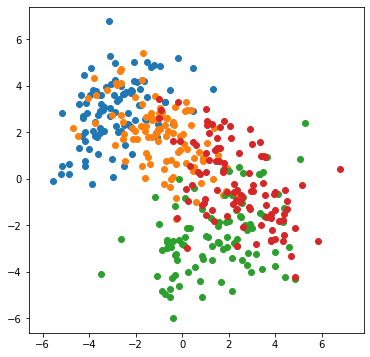

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
mean1 = [-3, 3]
cov1 = np.multiply([[1, 0.5], [0.5, 1]],2)
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
mean2 = [-1,2]
cov2 = np.multiply([[1, -0.5], [-0.5, 1]],2)
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
mean3 = [2, -2]
cov3 = np.multiply([[1, 0.5], [0.5, 1]],3)
x3, y3 = np.random.multivariate_normal(mean3, cov3, 100).T
mean4 = [2,0]
cov4 = np.multiply([[1, -0.5], [-0.5, 1]],3)
x4, y4 = np.random.multivariate_normal(mean4, cov4, 100).T
plt.plot(x1, y1, 'o')
plt.plot(x2,y2,'o')
plt.plot(x3, y3, 'o')
plt.plot(x4,y4,'o')
plt.plot()
plt.axis('equal')
plt.show()

In [4]:
data1 = pd.DataFrame([x1,y1],index = ['x','y'])
data2=pd.DataFrame([x2,y2],index = ['x','y'])
data_l = pd.concat([data1,data2],axis=1,ignore_index=True)
data_l=data_l.T
data_l['group'] = 0
data_l.head()

,x,y,group
0,-3.467096,3.214487,0
1,-1.208100,4.874435,0
2,-5.568086,-0.083092,0
3,-1.087660,1.808053,0
4,-3.387271,2.973187,0


In [5]:
data3 = pd.DataFrame([x3,y3],index = ['x','y'])
data4=pd.DataFrame([x4,y4],index = ['x','y'])
data_r = pd.concat([data3,data4],axis=1,ignore_index=True)
data_r=data_r.T
data_r['group'] = 1
data_r.head()

,x,y,group
0,2.974796,-4.023914,1
1,2.574675,-1.028442,1
2,2.484280,-1.603227,1
3,0.062728,-2.864180,1
4,2.993714,-2.119037,1


<AxesSubplot:xlabel='x', ylabel='y'>

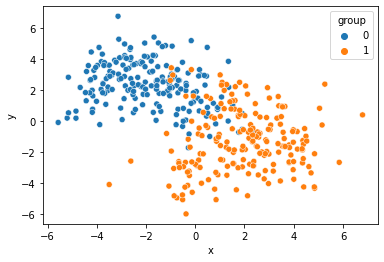

In [6]:
data_all = pd.concat([data_l,data_r],ignore_index = True)
sns.scatterplot(data=data_all,x='x',y='y',hue='group')

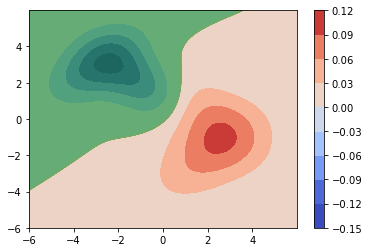

In [7]:
from scipy.stats import multivariate_normal
xes ,ys = np.mgrid[-6:6:0.01,-6:6:0.01]
pos = np.dstack((xes,ys))
rv_1 = multivariate_normal(mean1,cov1)
pdf_1 = rv_1.pdf(pos)
rv_2 = multivariate_normal(mean2,cov2)
pdf_2 = rv_2.pdf(pos)
#plt.contourf(xes,ys,pdf_1+pdf_2)

rv_3 = multivariate_normal(mean3,cov3)
pdf_3 = rv_3.pdf(pos)
rv_4 = multivariate_normal(mean4,cov4)
pdf_4 = rv_4.pdf(pos)
im = plt.contourf(xes,ys,-pdf_1-pdf_2+pdf_3+pdf_4,cmap = 'coolwarm', vmin = -0.12, vmax = 0.12)
plt.colorbar(im)
img = -pdf_1-pdf_2+pdf_3+pdf_4
x_bound , y_bound = np.where(img<0)
x_bound = x_bound/100 -6
y_bound = y_bound/100-6
plt.plot(x_bound,y_bound,color='g',alpha=0.5)




Text(0.5, 1.0, 'Bayes Decision Boundary')

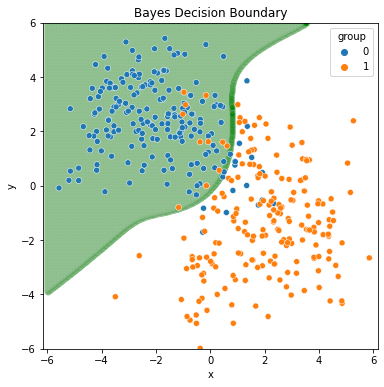

In [9]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=x_bound,y=y_bound,color='g',alpha=0.1)
sns.scatterplot(data=data_all,x='x',y='y',hue='group')
ax.axis('equal')
ax.set(ylim=(-6,6))
ax.set(xlim=(-6,6))
ax.set_title('Bayes Decision Boundary')


Now, we will perform KNN method and compare with the Bayes Decision Boundary

In [10]:
ndat = data_all.to_numpy()
X = ndat[:,:2]

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,data_all['group'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(-6,6,0.01), np.arange(-6,6,0.01))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'KNN decision boundary(N_neigh = 1), in comparison to Bayes decision boundary')

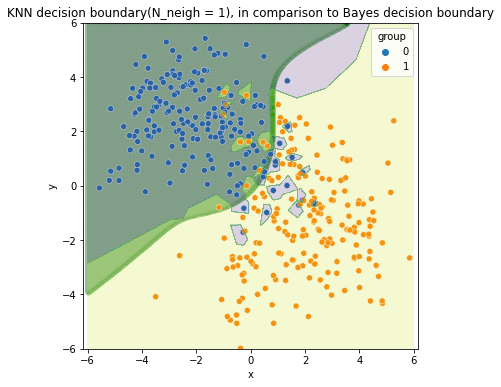

In [12]:
plt.figure(figsize=(6,6))

ax = sns.scatterplot(x=x_bound,y=y_bound,color='g',alpha=0.1)
sns.scatterplot(data=data_all,x='x',y='y',hue='group')
plt.contourf(xx,yy,Z,alpha=0.2)
ax.axis('equal')
ax.set(ylim=(-6,6))
ax.set(xlim=(-6,6))

ax.set_title('KNN decision boundary(N_neigh = 1), in comparison to Bayes decision boundary')

In [13]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X,data_all['group'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Text(0.5, 1.0, 'KNN decision boundary(N_neigh = 10), in comparison to Bayes decision boundary')

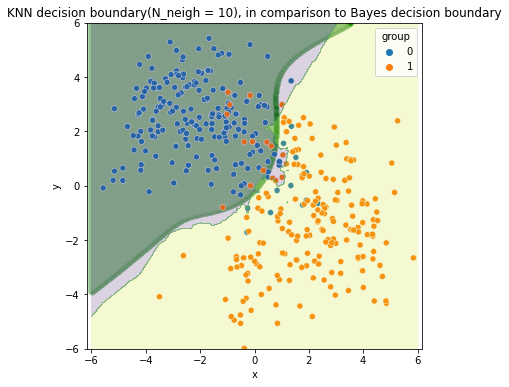

In [14]:
plt.figure(figsize=(6,6))

ax = sns.scatterplot(x=x_bound,y=y_bound,color='g',alpha=0.1)
sns.scatterplot(data=data_all,x='x',y='y',hue='group')
plt.contourf(xx,yy,Z,alpha=0.2)
ax.axis('equal')
ax.set(ylim=(-6,6))
ax.set(xlim=(-6,6))

ax.set_title('KNN decision boundary(N_neigh = 10), in comparison to Bayes decision boundary')

Text(0.5, 1.0, 'KNN decision boundary(N_neigh = 100), in comparison to Bayes decision boundary')

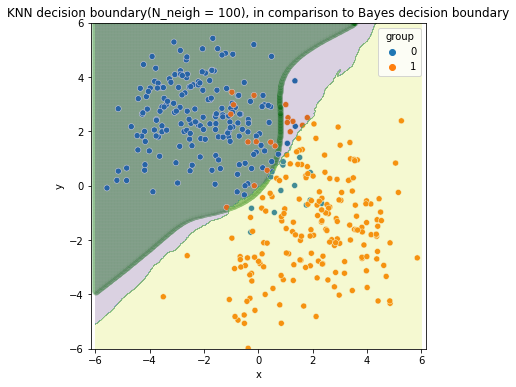

In [15]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X,data_all['group'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))

ax = sns.scatterplot(x=x_bound,y=y_bound,color='g',alpha=0.1)
sns.scatterplot(data=data_all,x='x',y='y',hue='group')
plt.contourf(xx,yy,Z,alpha=0.2)
ax.axis('equal')
ax.set(ylim=(-6,6))
ax.set(xlim=(-6,6))

ax.set_title('KNN decision boundary(N_neigh = 100), in comparison to Bayes decision boundary')

In the above graphs, the effect of the number of nearest neighbors can be seen. For too few neighbors, the decision boundaries have a granular effect, picking out small boundaries that do not exist in the original data (from the Bayes decision boundary). Too many neighbors, and all the details of the boundary are erased. The optimum number of neighbors can be found by plotting the test error rate vs. k (number of neighbors).

 - Exercise 10:

In [16]:
Boston_data = pd.read_csv('/Users/melistekant/Documents/Python Projects/ISLR2/Boston.csv')

In [17]:
Boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [18]:
Bos = Boston_data.drop('Unnamed: 0', axis =1);

In [19]:
Bos.shape

(506, 13)

This dataset contains 13 attributes (crime, zoning, businesses, Charles River, Nitrogen Oxides concentration, number of rooms, owner occupied units, mean distance to employment centers, accessibility to raial highways, tax rate, pupil/teacher ratio, percent lower status, median value of owner occupied residences) and 506 entries. 

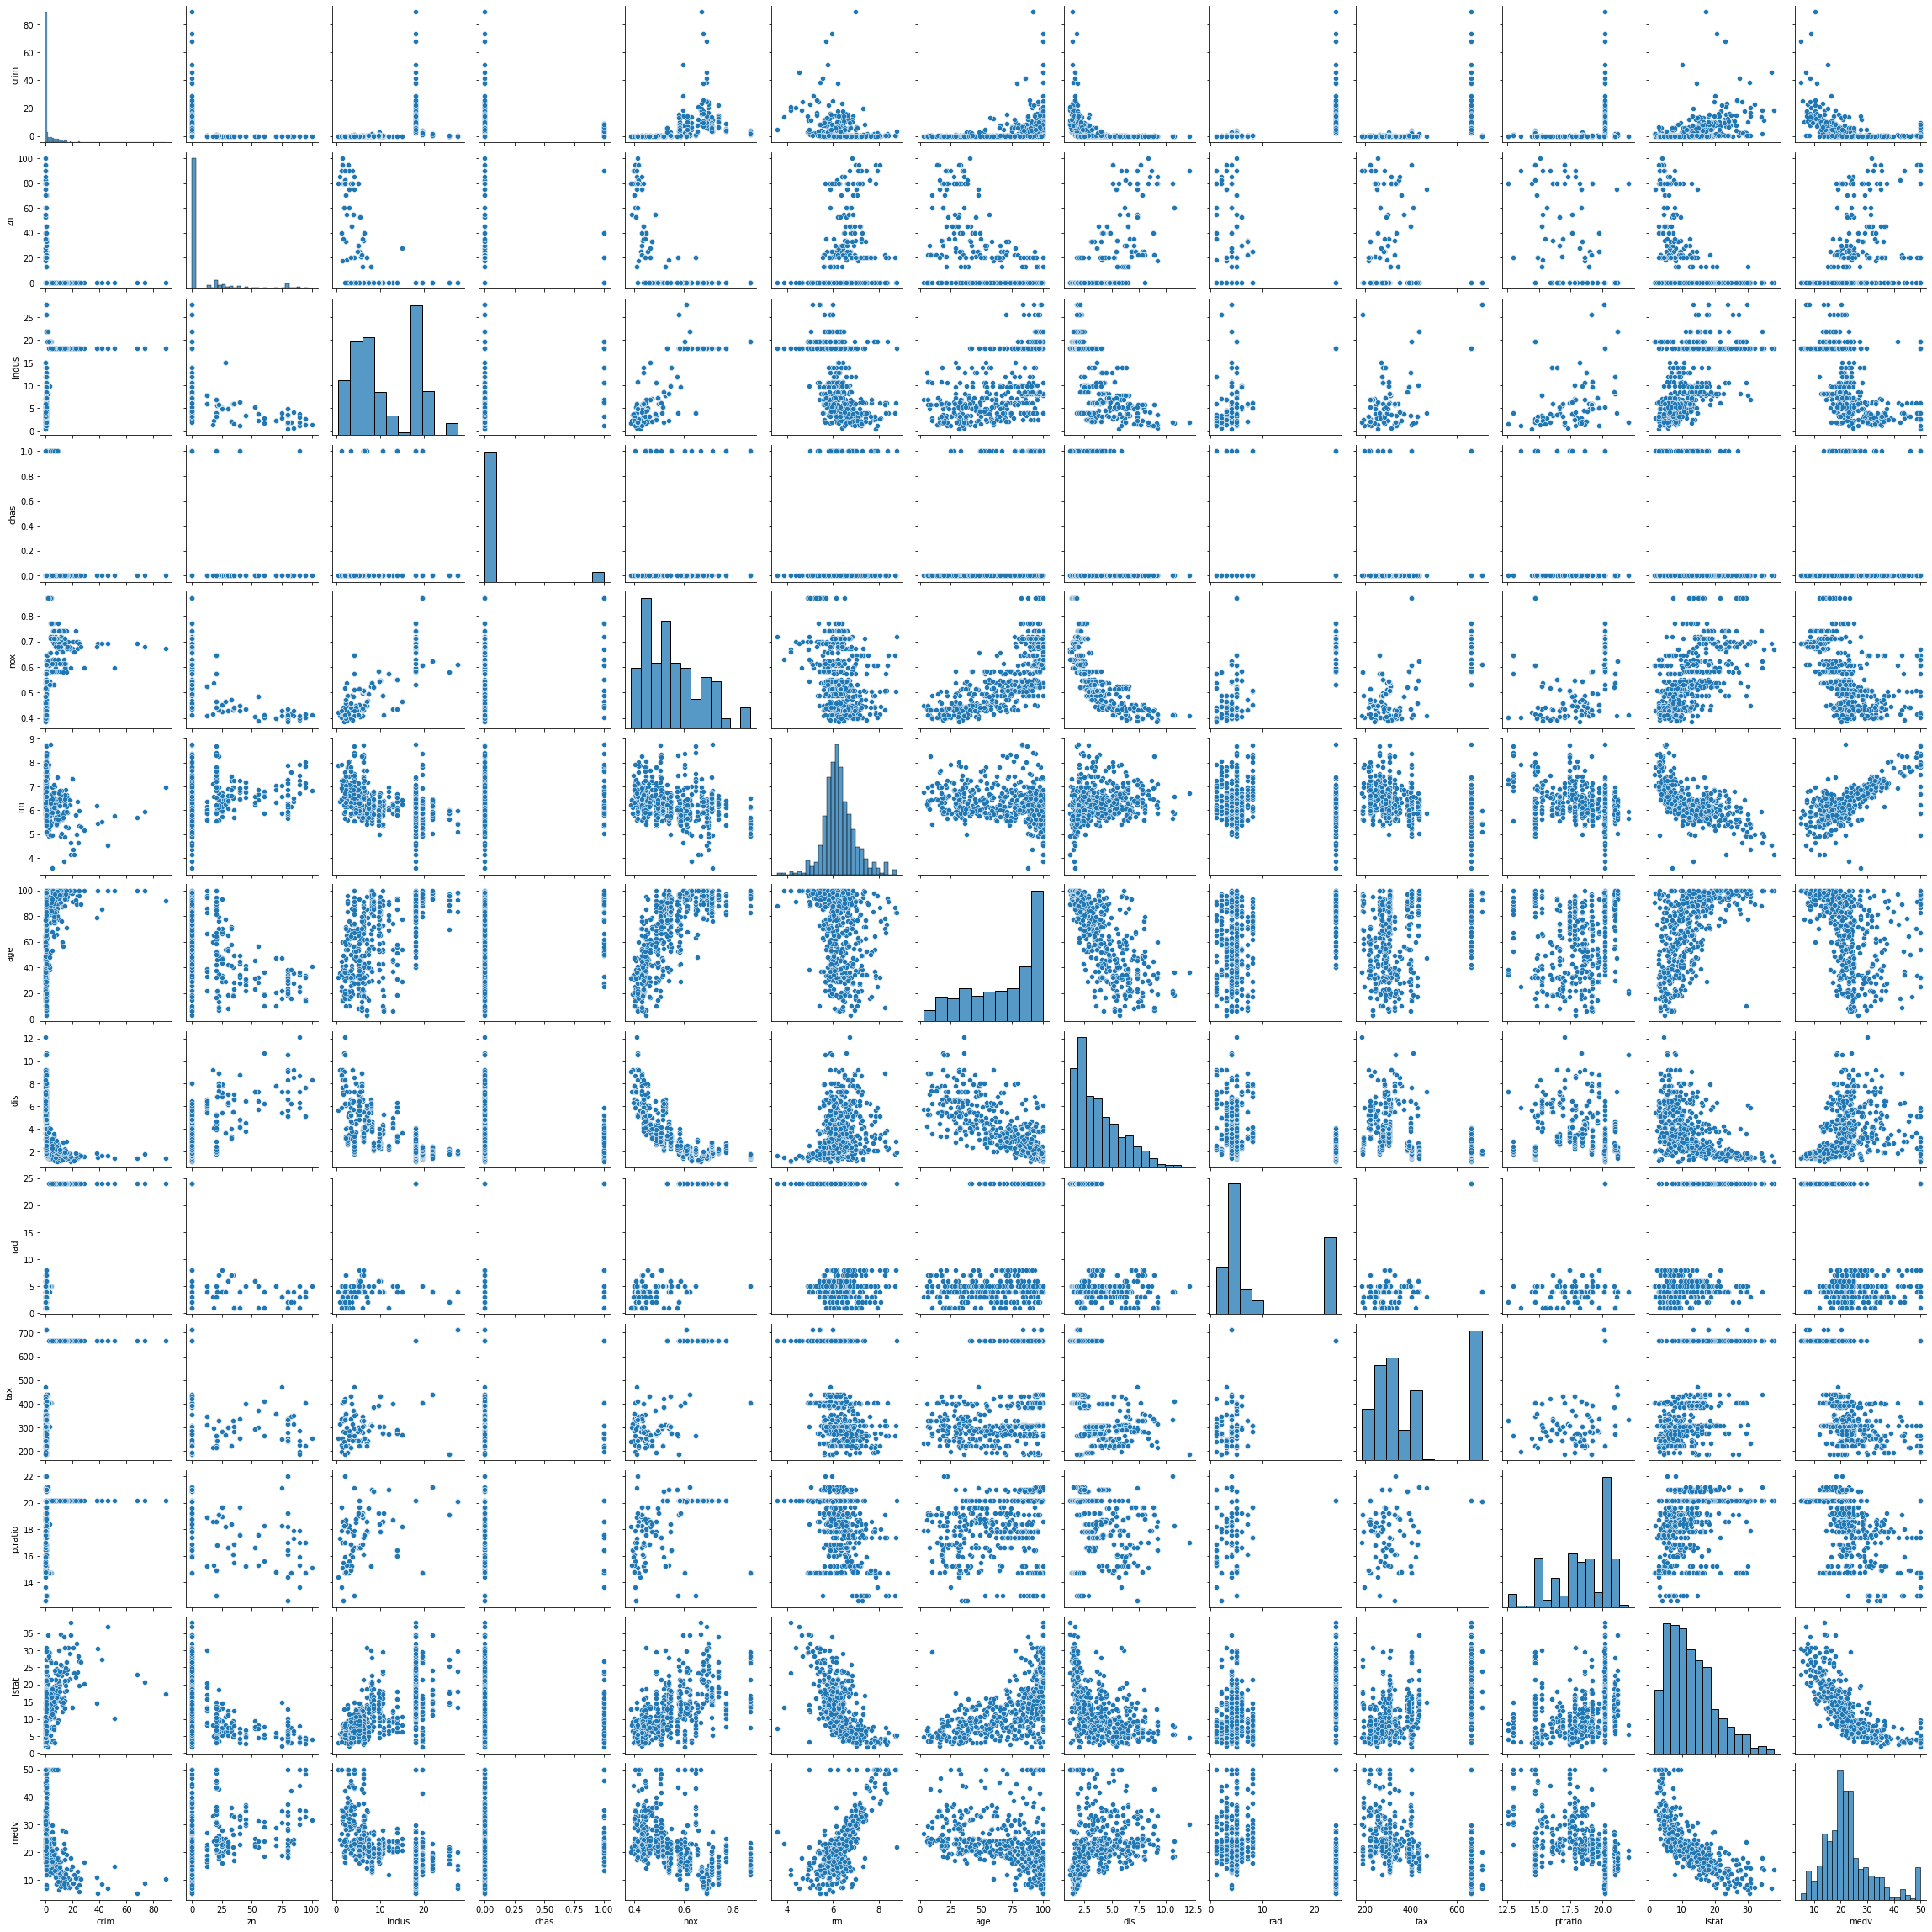

In [20]:
sns.pairplot(Bos)

Many pairwise distributions follow clear trends: some display positive correlation, such as the median value of owner-occupied homes vs. average number of rooms, and others are negatively correlated, such as the distance to the employment centers vs. nitrogen oxides concentration.

In [21]:
Bos.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

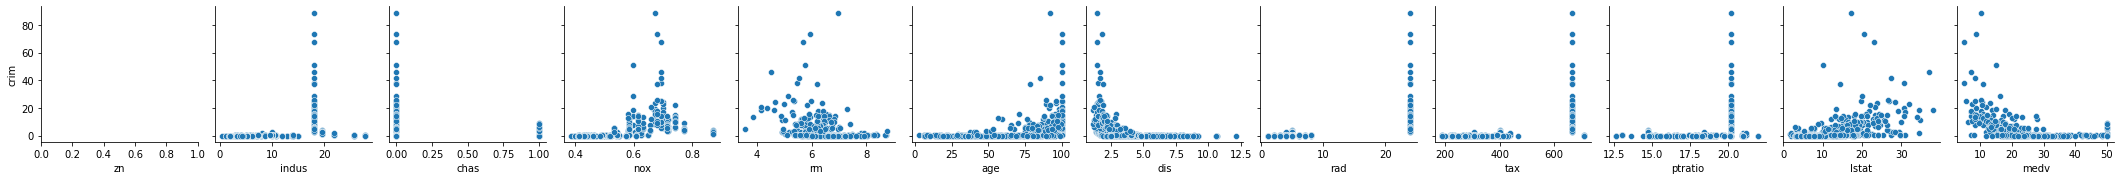

In [22]:
sns.pairplot(Bos, x_vars = Bos.columns.drop("crim"), y_vars = ["crim"])

In [23]:
Crim_corr=Bos[Bos.columns].apply(lambda x: x.corr(Bos['crim']))
print(Crim_corr.sort_values(ascending = False))

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
dtype: float64


Text(0, 0.5, 'crim')

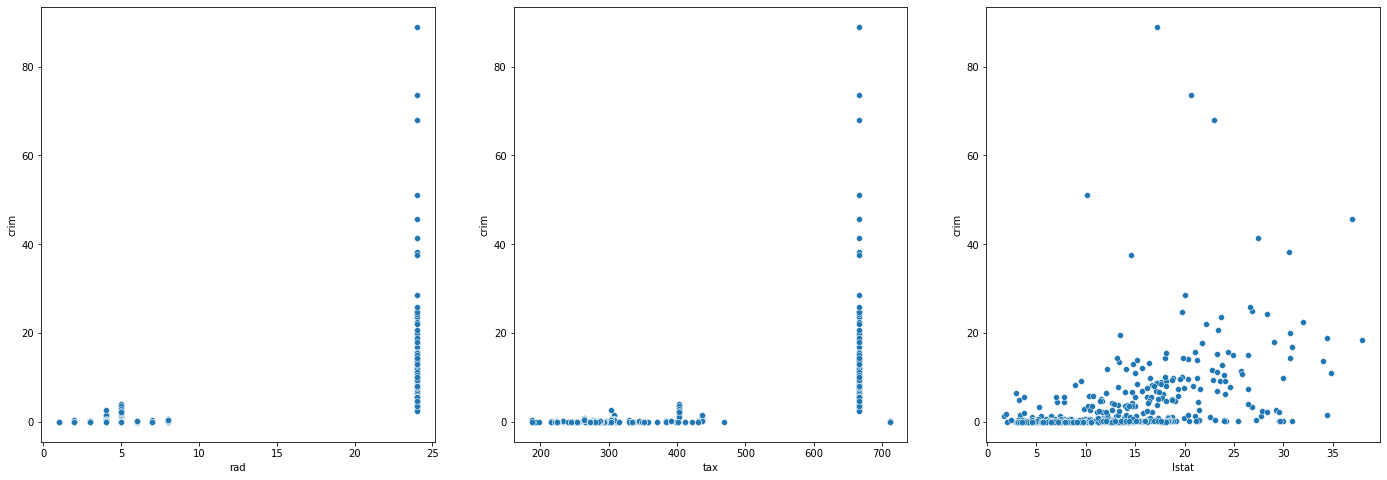

In [24]:
fig, axes = plt.subplots(1,3,figsize=(24,8))
sns.scatterplot(ax=axes[0],x=Bos['rad'].values,y=Bos['crim'].values)
axes[0].set_xlabel("rad")
axes[0].set_ylabel('crim')
sns.scatterplot(ax=axes[1],x=Bos['tax'].values,y=Bos['crim'].values)
axes[1].set_xlabel("tax")
axes[1].set_ylabel('crim')
sns.scatterplot(ax=axes[2],x=Bos['lstat'].values,y=Bos['crim'].values)
axes[2].set_xlabel('lstat')
axes[2].set_ylabel('crim')

The predictors with the highest association with per capita crime rate (largest absolute value Pearson correlation) are accessibility to radial highways, property tax rate, and lower status of population. All predictors are positively correlated with crime rate. For the first two predictors, crime only increases at a specific predictor value, pointing to potential concerns with the data. 

In [25]:
Bos["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: crim, dtype: float64

The maximum value of 89 is many standard deviations away from the mean of 3.6.

<AxesSubplot:xlabel='crim', ylabel='Count'>

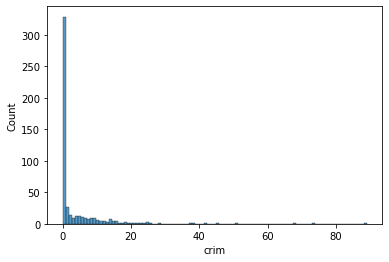

In [26]:
sns.histplot(Bos['crim'])

This long tail is apparent in the histogram as well.

In [27]:
Bos["tax"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

<AxesSubplot:xlabel='tax', ylabel='Count'>

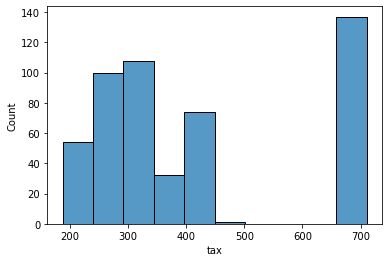

In [28]:
sns.histplot(Bos['tax'])

In [29]:
Bos[Bos['tax']>600].count()[0]

137

Similarly with tax rates, there are 137 entries which have higher taxes (about 700) than the rest of the distribution (centered around 300). 

In [30]:
Bos['ptratio'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

<AxesSubplot:xlabel='ptratio', ylabel='Count'>

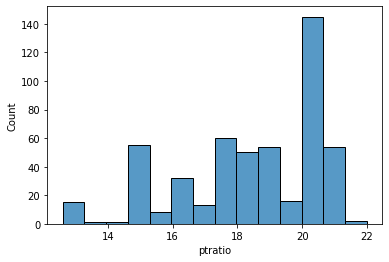

In [31]:
sns.histplot(Bos['ptratio'])

The pupil-teacher ratios seem more evenly distributed than the other predictors. 

In [32]:
Bos[Bos['chas']==1].count()[0]

35

35 tracts bound the Charles River.

In [33]:
Bos['ptratio'].median()

19.05

In [34]:
Bos['medv'].idxmin()

398

In [35]:
Bos.iloc[398]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [36]:
Bos[Bos['rm']>7].count()[0]

64

In [37]:
Bos[Bos['rm']>8].count()[0]

13

In [38]:
Bos[Bos['rm']>8].mean()

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
lstat        4.310000
medv        44.200000
dtype: float64

In [39]:
Bos.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
lstat       12.653063
medv        22.532806
dtype: float64

The median value of homes is much higher than the average. The lower status of the population and crime rate are much lower than the average.